In [3]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
#import pandasql
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

%matplotlib inline

In [4]:
days = pandas.read_csv("days_only.csv", index_col=0)

In [5]:
days.head()

,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed
2013-01-02,1690.760,14632.39,12.050,572.0,8.650
2013-01-03,1928.390,15305.22,12.340,702.0,7.940
2013-01-04,1821.275,14944.48,11.855,631.5,8.245
2013-01-07,1657.510,14625.53,12.020,609.0,8.820
2013-01-08,1794.495,14882.82,12.120,662.0,8.295


In [6]:
#total per business day (some days had multiple trips)
cleaner = days.dropna() #this drops a lot of rows since it's using 'any' NA by default 
somedays = cleaner.astype('int')
#somedays = days.astype('int') #can't just do this straightaway, because NA can't be 'int'

In [17]:
somedays.describe()

,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,1517.260355,11569.023669,11.325444,482.473373,7.053254
std,759.822201,4356.646169,1.645883,166.538429,1.315025
min,283.000000,1114.000000,4.000000,84.000000,1.000000
25%,1186.000000,9483.000000,11.000000,387.000000,7.000000
50%,1334.000000,11142.000000,11.000000,452.000000,7.000000
75%,1785.000000,14919.000000,12.000000,620.000000,8.000000
max,6862.000000,29403.000000,18.000000,1061.000000,9.000000


In [18]:
somedays.Calories.sum()

81538

In [14]:
font = {'family': 'arial',
        'weight': 'regular',
        'size' : 22}
matplotlib.rc('font', **font)

(0, 1000)

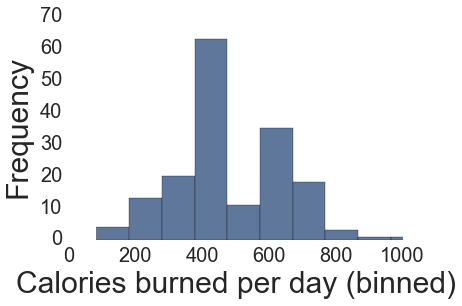

In [20]:
days['Calories'].hist() #pandas hist function seems happier than matplotlib's in this case (was giving an attribute error)
plt.xlabel('Calories burned per day (binned)', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)
plt.xlim(0,1000)
#matplotlib.rc('xtick', labelsize=20)
#matplotlib.rc('ytick', labelsize=20)

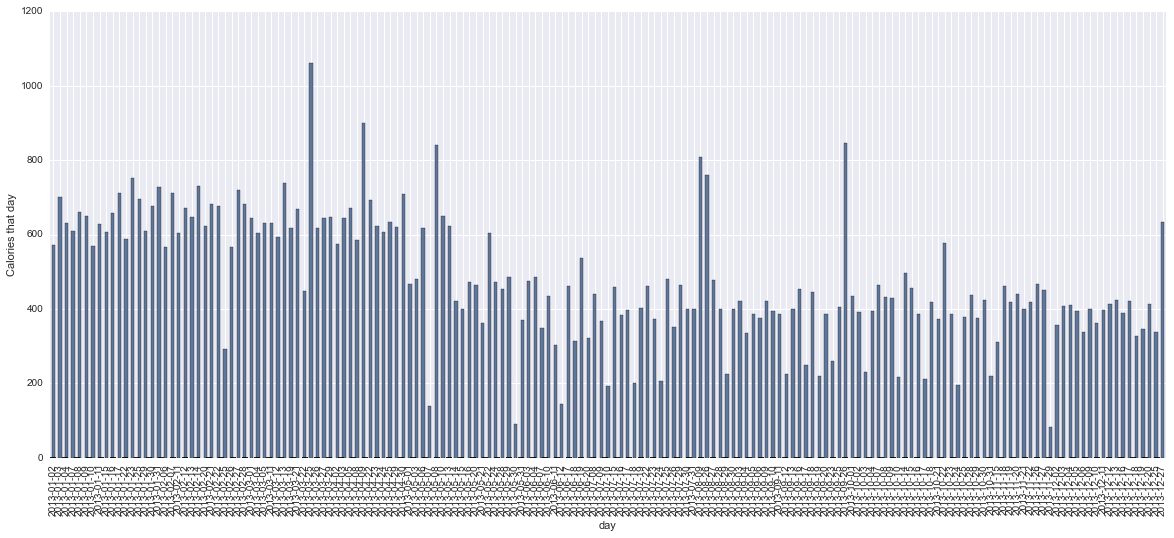

In [14]:
#still a little crowded, but ok for now
plt.figure()

    plt.rcParams['figure.figsize'] = 20, 8
    somedays['Calories'].plot(kind='bar')
    plt.xlabel('day')
    plt.ylabel('Calories that day')

In [30]:
days2 = somedays.reset_index()

q="""SELECT *
FROM days2
ORDER BY RANDOM()
LIMIT 100"""

subset = pandasql.sqldf(q, locals())

In [31]:
subset.head() #omg it loses the index if you don't make it back into a column again 

,index,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed
0,2013-07-25,1304,11167,12,482,8
1,2013-03-13,1904,15269,12,738,8
2,2013-11-26,1132,9691,13,467,8
3,2013-12-18,1007,8059,12,328,7
4,2013-04-03,1741,14917,18,645,8


In [32]:
#need to reset the date as the index
date_subset = subset.set_index(['index'])
date_subset.head()

,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageSpeed
index,,,,,
2013-07-25,1304,11167,12,482,8
2013-03-13,1904,15269,12,738,8
2013-11-26,1132,9691,13,467,8
2013-12-18,1007,8059,12,328,7
2013-04-03,1741,14917,18,645,8


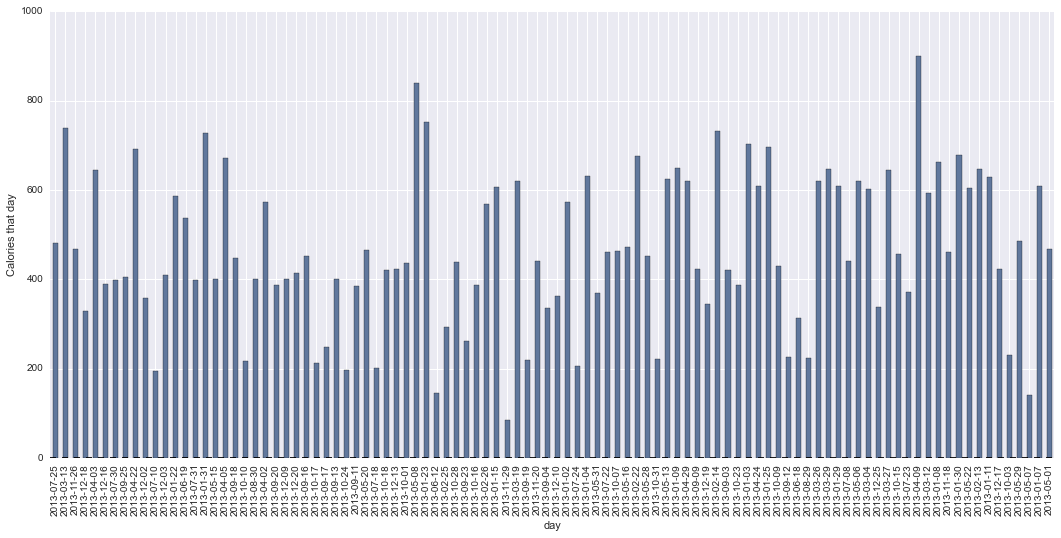

In [36]:
plt.figure()
plt.rcParams['figure.figsize'] = 18, 8
date_subset['Calories'].plot(kind='bar')
plt.xlabel('day')
plt.ylabel('Calories that day')